# Questions:
 - Which brand holds the most value vs mileage?
 - Which brand depreciates the most in the first 5 years?
 - Price difference per state.
 - Which car brands should you go for to get the best value?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
plt.style.use('ggplot')
sns.set_palette(palette='Set1')
sns.set_style("darkgrid")

In [2]:
cars = pd.read_csv('Data/vehicles.csv')

In [3]:
cars.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
id,7240372487,7240309422,7240224296,7240103965,7239983776
url,https://auburn.craigslist.org/ctd/d/auburn-uni...,https://auburn.craigslist.org/cto/d/auburn-201...,https://auburn.craigslist.org/cto/d/auburn-200...,https://auburn.craigslist.org/cto/d/lanett-tru...,https://auburn.craigslist.org/cto/d/auburn-200...
region,auburn,auburn,auburn,auburn,auburn
region_url,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org,https://auburn.craigslist.org
price,35990,7500,4900,2000,19500
year,2010,2014,2006,1974,2005
manufacturer,chevrolet,hyundai,bmw,chevrolet,ford
model,corvette grand sport,sonata,x3 3.0i,c-10,f350 lariat
condition,good,excellent,good,good,excellent


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    458213 non-null  int64  
 1   id            458213 non-null  int64  
 2   url           458213 non-null  object 
 3   region        458213 non-null  object 
 4   region_url    458213 non-null  object 
 5   price         458213 non-null  int64  
 6   year          457163 non-null  float64
 7   manufacturer  439993 non-null  object 
 8   model         453367 non-null  object 
 9   condition     265273 non-null  object 
 10  cylinders     287073 non-null  object 
 11  fuel          454976 non-null  object 
 12  odometer      402910 non-null  float64
 13  title_status  455636 non-null  object 
 14  transmission  455771 non-null  object 
 15  VIN           270664 non-null  object 
 16  drive         324025 non-null  object 
 17  size          136865 non-null  object 
 18  type

In [5]:
cars.region.unique()

array(['auburn', 'birmingham', 'dothan', 'florence / muscle shoals',
       'gadsden-anniston', 'huntsville / decatur', 'mobile', 'montgomery',
       'tuscaloosa', 'anchorage / mat-su', 'fairbanks', 'kenai peninsula',
       'southeast alaska', 'flagstaff / sedona', 'mohave county',
       'phoenix', 'prescott', 'show low', 'sierra vista', 'tucson',
       'yuma', 'fayetteville', 'fort smith', 'jonesboro', 'little rock',
       'texarkana', 'bakersfield', 'chico', 'fresno / madera',
       'gold country', 'hanford-corcoran', 'humboldt county',
       'imperial county', 'inland empire', 'los angeles',
       'mendocino county', 'merced', 'modesto', 'monterey bay',
       'orange county', 'palm springs', 'redding', 'reno / tahoe',
       'sacramento', 'san diego', 'san luis obispo', 'santa barbara',
       'santa maria', 'SF bay area', 'siskiyou county', 'stockton',
       'susanville', 'ventura county', 'visalia-tulare', 'yuba-sutter',
       'boulder', 'colorado springs', 'denver', 'e

In [6]:
cars.drop(columns=['Unnamed: 0','id', 'url', 'region_url','VIN', 'image_url', 'lat', 'long', 'region'], inplace=True)
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458213 entries, 0 to 458212
Data columns (total 17 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         458213 non-null  int64  
 1   year          457163 non-null  float64
 2   manufacturer  439993 non-null  object 
 3   model         453367 non-null  object 
 4   condition     265273 non-null  object 
 5   cylinders     287073 non-null  object 
 6   fuel          454976 non-null  object 
 7   odometer      402910 non-null  float64
 8   title_status  455636 non-null  object 
 9   transmission  455771 non-null  object 
 10  drive         324025 non-null  object 
 11  size          136865 non-null  object 
 12  type          345475 non-null  object 
 13  paint_color   317370 non-null  object 
 14  description   458143 non-null  object 
 15  state         458213 non-null  object 
 16  posting_date  458185 non-null  object 
dtypes: float64(2), int64(1), object(14)
memory usage

In [7]:
cars.drop_duplicates(subset = ['description'], inplace=True)

In [8]:
pd.DataFrame(100*cars.isnull().sum()/len(cars), columns=['NaN%'])

,NaN%
price,0.000000
year,0.179785
manufacturer,3.637849
model,1.048009
condition,40.179213
cylinders,36.112585
fuel,0.577341
odometer,10.519373
title_status,0.414468
transmission,0.558348


In [9]:
cars['age'] = 2021 - cars.year

In [10]:
cars.state.unique()

array(['al', 'ak', 'az', 'ar', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga',
       'hi', 'id', 'il', 'in', 'ia', 'ks', 'ky', 'la', 'me', 'md', 'ma',
       'mi', 'mn', 'ms', 'mo', 'mt', 'nc', 'ne', 'nv', 'nj', 'nm', 'ny',
       'nh', 'nd', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx',
       'ut', 'vt', 'va', 'wa', 'wv', 'wi', 'wy'], dtype=object)

In [11]:
cars.title_status.unique()

array(['clean', 'lien', 'missing', 'salvage', 'rebuilt', nan,
       'parts only'], dtype=object)

In [12]:
cars = cars[cars.title_status!='parts only']

In [13]:
cars.manufacturer.unique()

array(['chevrolet', 'hyundai', 'bmw', 'ford', 'toyota', 'jeep', 'ram',
       nan, 'honda', 'dodge', 'lexus', 'mercedes-benz', 'cadillac', 'gmc',
       'subaru', 'infiniti', 'mazda', 'mini', 'nissan', 'volkswagen',
       'kia', 'lincoln', 'mitsubishi', 'buick', 'audi', 'rover',
       'chrysler', 'fiat', 'acura', 'volvo', 'pontiac', 'tesla', 'saturn',
       'mercury', 'datsun', 'porsche', 'jaguar', 'ferrari', 'alfa-romeo',
       'harley-davidson', 'land rover', 'aston-martin', 'morgan',
       'hennessey'], dtype=object)

In [14]:
cars.loc[cars.manufacturer == 'rover','manufacturer'] = 'land rover'

In [15]:
cars.dropna(subset=['year','title_status','manufacturer'], inplace=True)

# EDA

As somebody that has been looking to buy cars several times in my life, I know that some people (mostly dealerships) post cars with an extremely low price so their posts appear regardless of the filters you apply in your search, or they post the downpayment as the price. To take care of this, we'll apply our own little filter, that is, we want to drop all rows that have a newer car with a price below certain price threshold.

Let's see what the best threshold might be:

In [16]:
cars.describe()

,price,year,odometer,age
count,3.687960e+05,368796.000000,3.320100e+05,368796.000000
mean,4.244243e+04,2010.926859,1.004221e+05,10.073141
std,8.901176e+06,8.623170,3.555933e+06,8.623170
min,0.000000e+00,1900.000000,0.000000e+00,0.000000
25%,4.900000e+03,2008.000000,3.926200e+04,5.000000
50%,1.099900e+04,2013.000000,8.457750e+04,8.000000
75%,2.149500e+04,2016.000000,1.318475e+05,13.000000
max,3.615215e+09,2021.000000,2.043756e+09,121.000000


We have outliers in price and odometer, we can visualize this better with a boxplot:

<AxesSubplot:>

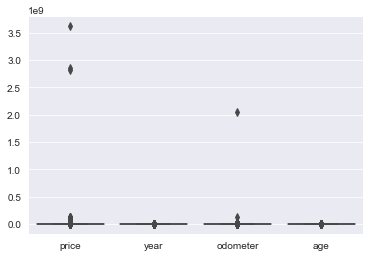

In [17]:
sns.boxplot(data=cars)

We'll drop those that are above `$500,000`, those below `$100`, and those 500,000 miles:

In [18]:
cars = cars[cars.odometer<500000]

In [19]:
cars = cars[cars.price<500000]
cars = cars[cars.price>100]

In [20]:
cars[cars.year>2010].describe()

,price,year,odometer,age
count,200453.000000,200453.000000,200453.000000,200453.000000
mean,21086.144273,2015.233736,67865.184747,5.766264
std,13452.161163,2.562672,47397.948480,2.562672
min,101.000000,2011.000000,0.000000,0.000000
25%,11595.000000,2013.000000,29706.000000,4.000000
50%,18200.000000,2015.000000,59750.000000,6.000000
75%,28590.000000,2017.000000,98820.000000,8.000000
max,384995.000000,2021.000000,490000.000000,10.000000


Here we see our IQR for cars from 2011 or newer is between `$8800` and `$27K`. 

In [21]:
cars[(cars.year>2000) & (cars.year<2011)].describe()

,price,year,odometer,age
count,88699.000000,88699.000000,88699.000000,88699.000000
mean,7677.321458,2006.499791,140351.506680,14.500209
std,6450.115524,2.580309,56301.279845,2.580309
min,101.000000,2001.000000,0.000000,11.000000
25%,3875.000000,2005.000000,106000.000000,12.000000
50%,5950.000000,2007.000000,140000.000000,14.000000
75%,9200.000000,2009.000000,174910.000000,16.000000
max,200000.000000,2010.000000,498888.000000,20.000000


Here we see our IQR for cars from 2001 to 2010 is between `$3500` and `$9000`. 

In [22]:
cars[(cars.year>1900) & (cars.year<2000)].describe()

,price,year,odometer,age
count,14082.000000,14082.000000,14082.000000,14082.000000
mean,9485.644653,1987.931544,126542.882758,33.068456
std,13062.890199,14.044119,78182.616981,14.044119
min,123.000000,1911.000000,0.000000,22.000000
25%,2700.000000,1984.000000,70000.000000,23.000000
50%,5100.000000,1994.000000,123000.000000,27.000000
75%,11000.000000,1998.000000,180000.000000,37.000000
max,389500.000000,1999.000000,493487.000000,110.000000


Here we see our IQR for cars from 1900 to 1999 is between `$2600` and `$12500`. 

In [23]:
cars[(cars.year>=1910) & (cars.year<=1949)].describe()

,price,year,odometer,age
count,353.000000,353.00000,353.000000,353.00000
mean,24624.407932,1937.76204,29704.903683,83.23796
std,16924.236798,7.87004,38493.484202,7.87004
min,700.000000,1911.00000,0.000000,72.00000
25%,12500.000000,1931.00000,800.000000,75.00000
50%,22000.000000,1939.00000,9000.000000,82.00000
75%,33950.000000,1946.00000,50000.000000,90.00000
max,123456.000000,1949.00000,200000.000000,110.00000


Interestinlgy, we can see how the IQR for cars from 1910 to 1949 is `$8500` to `$29500`. This is because most of this cars are classics, so people tend to restore them.

So, for our threshold, let's iterate over every year and plot the 25% quantile:

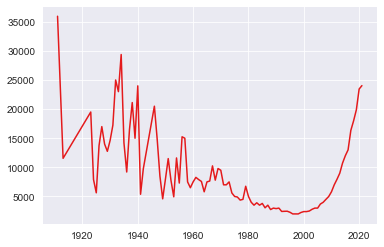

In [24]:
price_quantile={}
for year in np.sort(cars.year.unique()):
    price_quantile[year] = cars[cars.year == year].price.quantile(q=0.25)
plt.plot(pd.Series(price_quantile));

We can see how the quantile grahp becomes more uniform around 1980, starts to drop consistenly until around 1995 where takes the form of a growing exponential curve.

That being said, I think using this curve as our price threshold to eliminate false prices is going to yield the best results. Let's implement it:

In [25]:
df = pd.DataFrame()
for year in np.sort(cars.year.unique()):
    price = int(cars[cars.year == year].price.quantile(q=0.25))
    df = df.append(cars[(cars.year== year)&(cars.price>= price)])

In [26]:
df.reset_index(drop=True, inplace=True)
cars = df.copy()

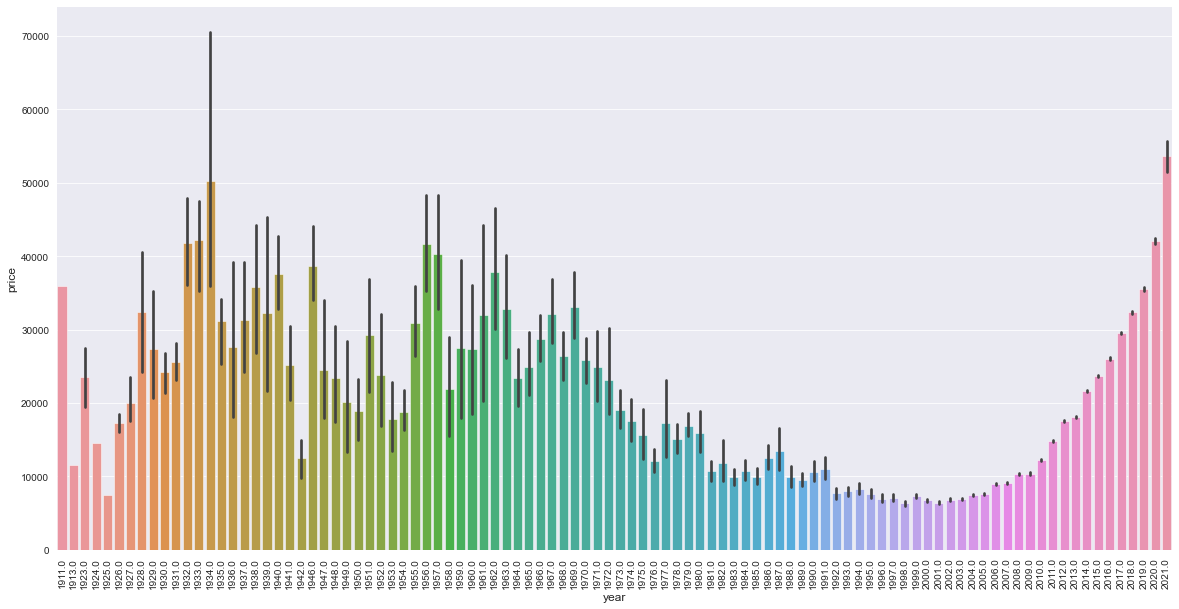

In [27]:
plt.figure(figsize=(20,10))
sns.barplot(x=cars.year, y=cars.price, data=cars)
plt.xticks(rotation=90)
plt.show()

Right around 1990, cars start to reappreciate. Let's look at the relation between age and mileage:

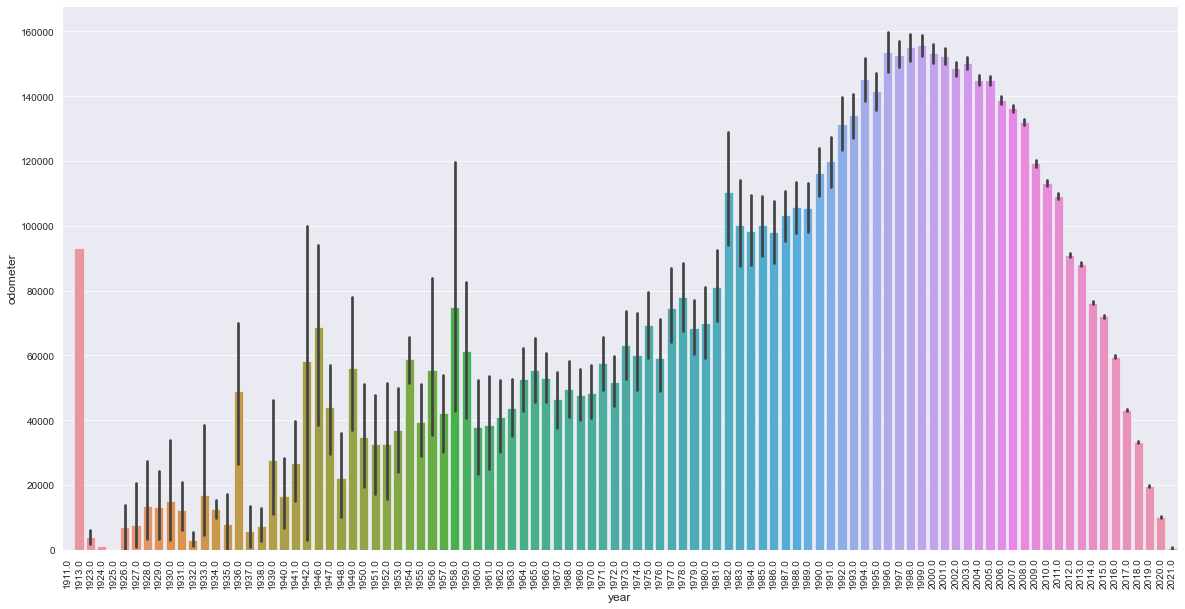

In [28]:
plt.figure(figsize=(20,10))
sns.barplot(x=cars.year, y=cars.odometer, data=cars)
plt.xticks(rotation=90)
plt.show()

Let's overlap them:

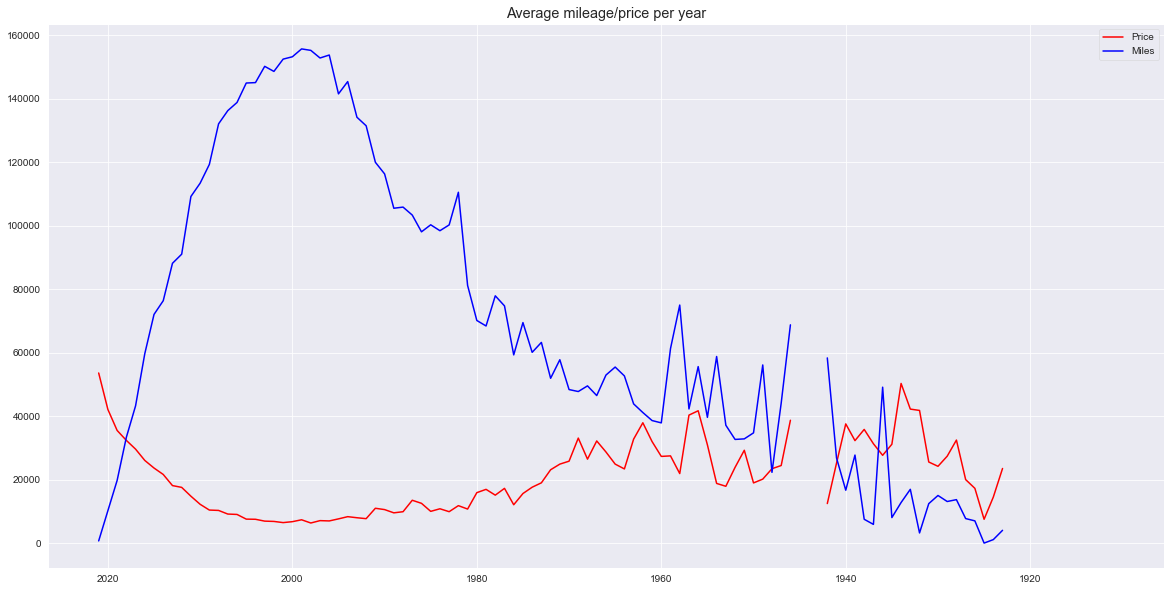

In [29]:
price_year = {}
odometer_year = {}
for i in range(1910, 2022):
    price_year[i] = cars[cars.year== i].price.mean()
    odometer_year[i] = cars[cars.year== i].odometer.mean()
    
plt.figure(figsize=(20,10))    
plt.plot(pd.DataFrame(pd.Series(price_year)), 'r', label='Price')
plt.plot(pd.DataFrame(pd.Series(odometer_year)), 'b', label = 'Miles')

plt.title('Average mileage/price per year')
plt.legend()
plt.gca().invert_xaxis()
plt.show()

We can see where the mileage starts to reduce right around 1995, and stays below 100K miles before 1980. This is reasonable because, most likely, any car that was driven more than 100k miles has either been restored, has a newer engine and transmission, or is sitting in a junkyard.

We can also see how both graph are negatively correlated, and they both follow the same trend.

We will have some outliars at the top end, but there are some expensive cars, however, those cars are collectables and are rarely driven, therefore, the mileage should be extremily low. Let's check:|

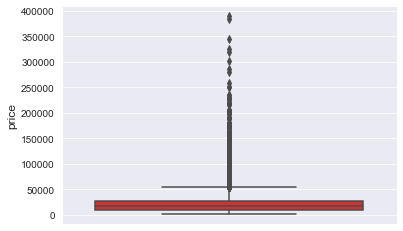

In [30]:
sns.boxplot(y=cars.price)
plt.show()

In [31]:
cars[(cars.price>100000)].describe()

,price,year,odometer,age
count,230.000000,230.000000,230.000000,230.000000
mean,148982.452174,2011.578261,26493.843478,9.421739
std,50046.329767,15.115291,40896.604120,15.115291
min,101951.000000,1934.000000,0.000000,0.000000
25%,116147.000000,2013.000000,2271.000000,2.000000
50%,129942.500000,2017.000000,9833.000000,4.000000
75%,169746.250000,2019.000000,28187.500000,8.000000
max,389500.000000,2021.000000,230000.000000,87.000000


There are indeed some outliers. We can see our IQR lies between 1500 and 27405 miles. Let's explore our last quartile:

In [32]:
cars[(cars.price>100000)&(cars.odometer>27405)].count()

price           59
year            59
manufacturer    59
model           56
condition       41
cylinders       37
fuel            57
odometer        59
title_status    59
transmission    58
drive           34
size            22
type            42
paint_color     42
description     59
state           59
posting_date    59
age             59
dtype: int64

There are only 66 observations.

In [33]:
cars[(cars.price>100000)&(cars.odometer>27405)].manufacturer.unique()

array(['mercedes-benz', 'jaguar', 'chevrolet', 'ford', 'ferrari',
       'porsche', 'ram', 'gmc', 'cadillac', 'dodge', 'lexus', 'toyota',
       'bmw', 'honda', 'subaru', 'buick', 'land rover'], dtype=object)

I am fairly confident `Honda` does not have any model that goes for more that $100K...

In [34]:
cars[(cars.price>100000)&(cars.odometer>27405)&(cars.manufacturer == 'toyota')]

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,state,posting_date,age
84506,151078,2011.0,toyota,avalon limited,excellent,6 cylinders,gas,151078.0,clean,automatic,fwd,full-size,sedan,silver,This is the Limited 2011 Toyota Avalon. Excel...,ks,2020-11-30T11:28:17-0600,10.0
97550,129000,2012.0,toyota,highlander,excellent,6 cylinders,gas,139000.0,clean,automatic,4wd,NaN,NaN,silver,* PLEASE!!!! LOOK BEFORE YOU CALL >>> * MORE P...,in,2020-11-21T09:39:02-0600,9.0


These are definitely typos. Most likely it's the same case with `Toyota`, `Chevrolet`, `Ram`, `Ford`, etc.

In [35]:
outliers = ['land rover', 'porsche', 'mercedes-benz', 'ram', 'gmc', 'ford',
       'lexus', 'jaguar', 'buick', 'chevrolet', 'ferrari', 'toyota',
       'bmw', 'honda', 'dodge', 'cadillac', 'jeep', 'subaru']
for outlier in outliers:
    print(cars.loc[(cars.price>100000)&(cars.odometer>27405)&(cars.manufacturer == outlier),['price','year','odometer','model', 'manufacturer']])
    print('________________________________________________________')

         price    year  odometer model manufacturer
199233  129985  2018.0   29244.0   NaN   land rover
200723  129985  2018.0   29244.0   NaN   land rover
________________________________________________________
         price    year  odometer          model manufacturer
1969    110000  1977.0   66000.0      911 turbo      porsche
1972    179888  1977.0   42000.0      930 turbo      porsche
3256    124500  1987.0   29397.0            911      porsche
3257    118800  1987.0   43408.0            911      porsche
4354    129900  1991.0   68968.0  911 turbo/965      porsche
151789  129777  2015.0   28250.0    911 turbo s      porsche
163128  108900  2016.0   42388.0            911      porsche
163694  108900  2016.0   42388.0            911      porsche
199796  145000  2018.0   28000.0      911 turbo      porsche
________________________________________________________
         price    year  odometer                model   manufacturer
520     139000  1959.0   35792.0  benz 190sl roadst

There are a few with a price of `123456`, `111111`, `234567`, clearly not real so we'll drop those. Most of them can be saved by dividing  by 10. The only correct ones are: `benz 190sl roadster`, all `porsche`, the `jaguar`, all `ferrari` and the `i8`:

In [36]:
cars = cars[~((cars.price == 123456) | (cars.price == 234567) | (cars.price == 111111) | (cars.price == 12345) | (cars.price == 1234) | (cars.price == 11111) | (cars.price == 123456))]



cars.loc[(cars.price>100000) &
    (cars.odometer>27405)&((cars.manufacturer == 'honda')|
    (cars.manufacturer=='cadillac') | (cars.manufacturer=='ford') | (cars.manufacturer=='gmc') |
    (cars.manufacturer=='jeep') | (cars.manufacturer== 'subaru') | (cars.manufacturer=='dodge') |
    (cars.manufacturer== 'toyota') | (cars.manufacturer=='buick') | 
    (cars.manufacturer=='lexus') | (cars.manufacturer=='ram') | ((cars.manufacturer=='bmw')&(cars.model == '335xi')) | 
    ((cars.manufacturer=='chevrolet')&(cars.model != 'covertte')) |  
    ((cars.manufacturer=='mercedes-benz')&(cars.model != 'benz 190sl roadster')) ),'price'] = cars.loc[(cars.price>100000) &
    (cars.odometer>27405)&((cars.manufacturer == 'honda')|
    (cars.manufacturer=='cadillac') | (cars.manufacturer=='ford') | (cars.manufacturer=='gmc') |
    (cars.manufacturer=='jeep') | (cars.manufacturer== 'subaru') | (cars.manufacturer=='dodge') |
    (cars.manufacturer== 'toyota') | (cars.manufacturer=='buick') | 
    (cars.manufacturer=='lexus') | (cars.manufacturer=='ram') | ((cars.manufacturer=='bmw')&(cars.model == '335xi')) | 
    ((cars.manufacturer=='chevrolet')&(cars.model != 'covertte')) |  
    ((cars.manufacturer=='mercedes-benz')&(cars.model != 'benz 190sl roadster')) ), 'price']/10

cars = cars[~((cars.manufacturer == 'land rover')&(cars.price>100000) &(cars.odometer>27405))]

In [37]:
cars.reset_index( drop=True, inplace=True)

Now let's see the average price vs the average mileage vs average price in 2020 for each brand to try and answer our first question:

### Which brand holds the most value vs mileage?

In [38]:
cars_s = cars.groupby(by='manufacturer').mean().sort_values(by='price',ascending=True).index

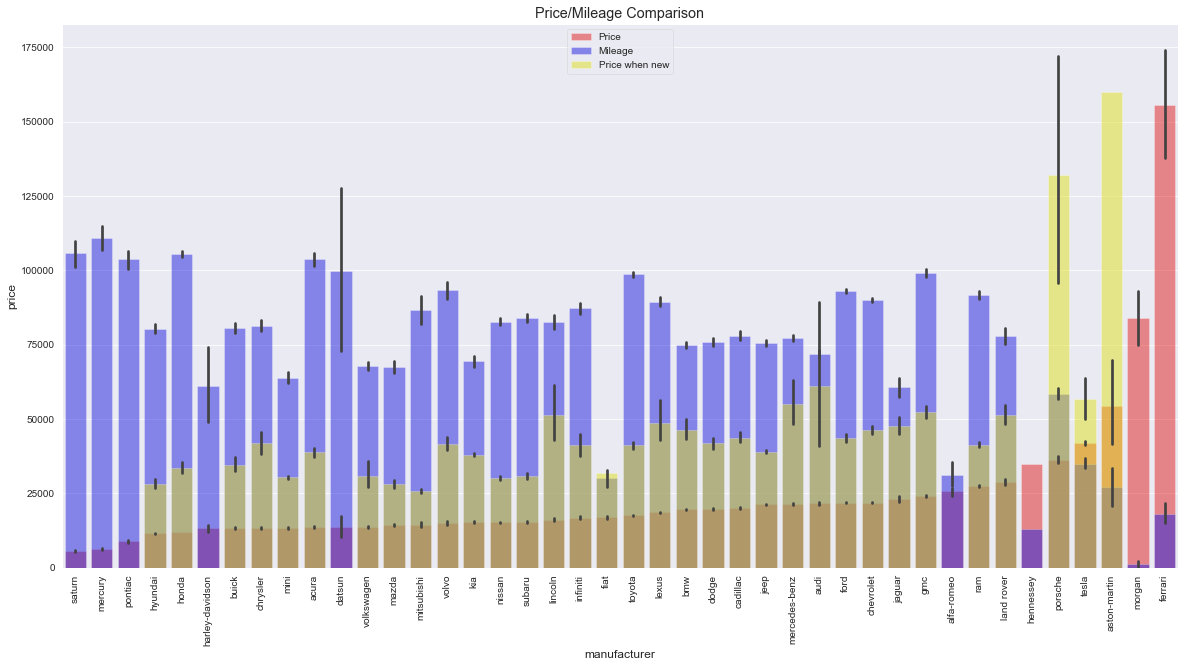

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(x="manufacturer", y="price", data=cars,order=cars_s, color='red', label='Price',alpha = 0.5)
sns.barplot(x="manufacturer", y="odometer", data=cars,order=cars_s, color='blue', label='Mileage', alpha = 0.5)
sns.barplot(x="manufacturer", y="price", data=cars[cars.year==2020],order=cars_s, color='yellow', label='Price when new', alpha = 0.5)
plt.legend()
plt.title("Price/Mileage Comparison")
plt.xticks(rotation=90)
plt.show()

We are missing the yellow bar for some of the manufacturers, however, these manufacturers are not that common and won't really affect our analysis. Here we are looking and the highest blue bar with the red bar as close as possible to the yellow bar. This might be hard to do visually, so let's use numbers:

We can see how much value, on average, each brand loses per mile driven.

In [40]:
((cars[cars.year==2020].groupby(by='manufacturer').price.mean()-cars.groupby(by='manufacturer').price.mean())/cars.groupby(by='manufacturer').odometer.mean()).sort_values()

manufacturer
mitsubishi         0.129826
ram                0.151797
nissan             0.181929
subaru             0.184229
mazda              0.203076
honda              0.203933
hyundai            0.205973
jeep               0.233301
ford               0.233449
toyota             0.237850
acura              0.242919
volkswagen         0.254250
mini               0.263724
buick              0.265782
chevrolet          0.270059
infiniti           0.278013
volvo              0.284925
gmc                0.285313
land rover         0.291034
dodge              0.291577
cadillac           0.302683
kia                0.327932
lexus              0.338333
chrysler           0.349721
bmw                0.358155
jaguar             0.404769
tesla              0.425080
lincoln            0.428106
mercedes-benz      0.435155
fiat               0.493482
audi               0.551040
porsche            1.639095
aston-martin       3.893381
alfa-romeo              NaN
datsun                  NaN
ferrari

This is very interesting. `Mitsubishi` holds the most value on average, followed by `Ram` (that's a surprise). You definitely do not want to buy a `Porsche` or `Aston Martin` if you mind losing about `$1.6` and `$3.8` respectively.

### Which brand depreciates the most in the first 5 years?

In [41]:
price_year = {}
df = pd.DataFrame()
for i in cars.manufacturer.unique():
    for x in range(6):
        price_year[2020-x]= cars[(cars.manufacturer == i)&(cars.year ==2020-x)].price.mean()
    df[i]= pd.Series(price_year, index=[2020,2019,2018,2017,2016,2015])



In [49]:
df = df.T

In [51]:
df['depreciation'] = 100-100*df[2015]/df[2020]
df=df.T

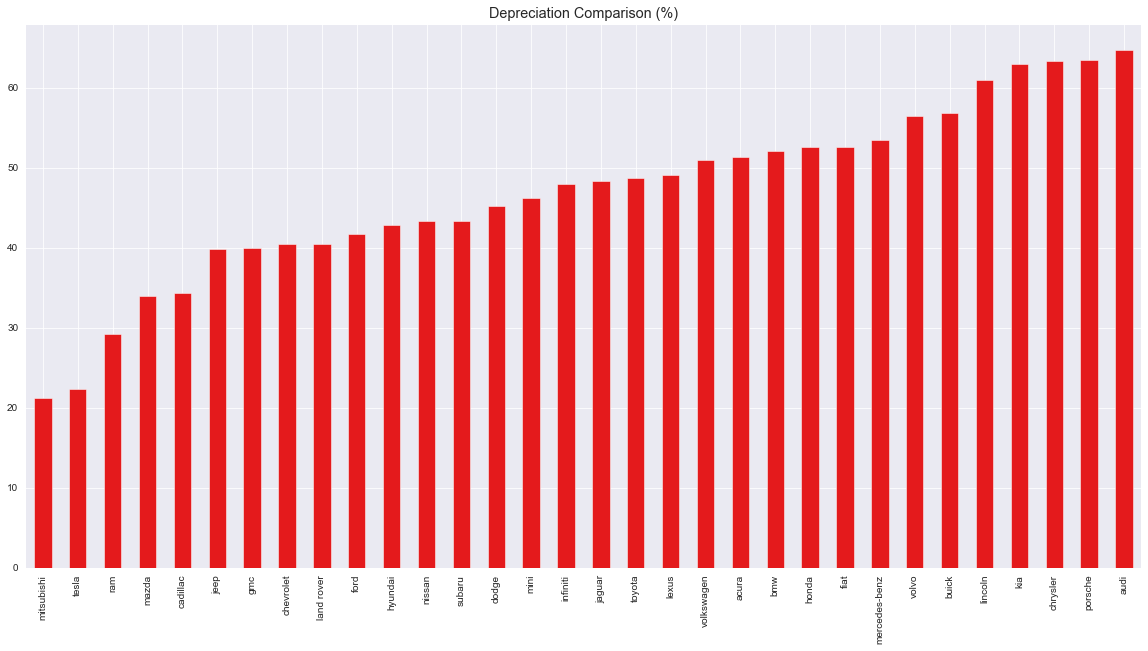

In [52]:
df.loc['depreciation',:].dropna().sort_values().plot(kind='bar',figsize=(20,10))
plt.title("Depreciation Comparison (%)")
plt.show()

A few interesting things to note:
 - `Kia` is the fourth brand that depreciates the most, right after high tier brands such as `Prosche` and `Audi`.
 - `Teslas` seems to depreciate the least in terms of years, but keep in mind that most teslas in this dataset have less than 50,000 miles.
 - `Mitsubishi` and `Ram` are still the two best brands in terms of holding value.
 - `Honda` loses over 50% of it's value, even though it is amongst the best brands in terms of value lost per miles... Maybe people don't like older Hondas? or maybe the rate at which they lose value is higher the first 5 years, after which they hit a plateau and hold their value?
 - Same applies for `Subaru`, `Hyundai`, and `Toyota` but to at around 10% less. 

### Price difference per state

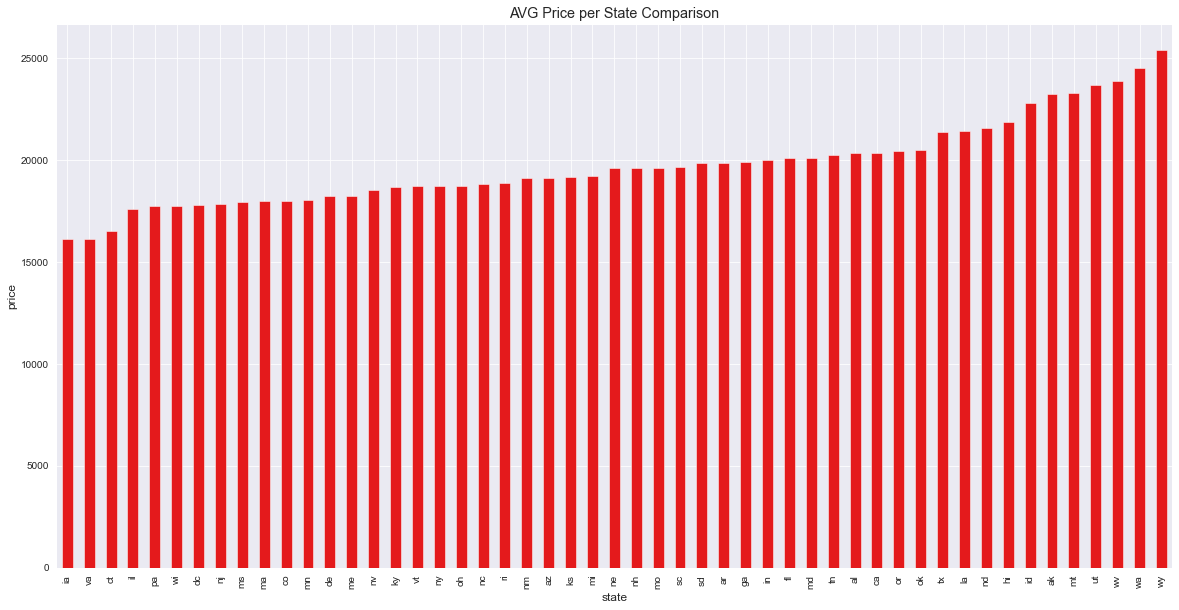

In [54]:
cars.groupby('state').price.mean().sort_values().plot(kind='bar',figsize=(20,10))
plt.title("AVG Price per State Comparison")
plt.ylabel('price')
plt.show()

Virgina and Iowa seem to be the cheapest states to buy cars in.

### Which car brands should you go for to get the best value?

From our analysis we can conclude that, on average, Mitsubishi is the winning brand for overall best value, with an average depreciation of `$0.129826` per mile driven and losing only 21% of it's value in the first 5 years. This is probably due to the fact that Mitsubishi is one of the cheaper brands and their new cars start around `$20K`, so there is not a lot of depreciation that happens in the first 5 years, compared to the original price.

Now, keep in mind that a deeper analysis of the models is necesary to have a better representation of each brand, but given the state of the dataset, that analysis is out of the scope of this analysis.

### Which model is holds the most value regardless of mileage and age? (This is for ML model)

First let's start by looking at what we are working with. Usually the 'model' section of the description is left for the seller to type in the model rather than giving them a drop-down selection menu. This makes it easier for typos and sellers adding more than it's necessary.

In [53]:
len(cars.model.unique())

18235

18504 unique values!!! Let's see how they are distributed:

In [ ]:
cars.loc[:,'model'].value_counts().head(500).index

Right off the bat we can see we have `f150` and `f-150`, `silverado 1500` and `silverado`, `sierra` and `sierra 1500`, etc.

In [ ]:
for model in cars.model.unique():
    
    print(re.search(model, list(cars.model.unique())))

In [ ]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process
l = []

for model in cars.model.dropna().unique():
    l.append(model)
process.extract('silverado', l, scorer=fuzz.WRatio)


In [ ]:
fuzz.token_sort_ratio(cars.model.dropna().unique(), 'silverado')

In [ ]:
def get_ratio(row):
    name = row['model']
    return fuzz.partial_token_sort_ratio(name, 'silverado')

cars[cars.apply(get_ratio, axis=1) > 77].sample(30, random_state=42)